# Sopstvene vrednosti i sopstveni vektori

Sopstveni vektori su vektori koji prilikom transformacije (matricom A) **ne menjaju svoj pravac**. **Smer (gore-dole, levo-desno) i duzina vektora se mogu promeniti** i tu promenu reflektuje sopstvena vrednost.

Sopstveni vektor matrice ${A}$ je ne-nula vektor ${v}$ za koji vazi ${A * v = lambda * v}$, ${lambda}$ - skalar

In [112]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [113]:
A = np.array([[1, 2], [2, 0]])
A

array([[1, 2],
       [2, 0]])

In [114]:
# sopstvene vrednosti i sopstveni vektori matrice A

values, vectors = np.linalg.eig(A)

In [115]:
# s. vrednosti

values

array([ 2.56155281, -1.56155281])

In [116]:
# s. vektori

vectors

array([[ 0.78820544, -0.61541221],
       [ 0.61541221,  0.78820544]])

In [117]:
type(vectors)

numpy.ndarray

In [118]:
# 0-ta kolona n-dimenzionog niza sopstvenih vektora

vectors[:, 0]

array([0.78820544, 0.61541221])

In [119]:
# norma svakog sopstvenog vektora je 1

np.linalg.norm(vectors[:, 0]), np.linalg.norm(vectors[:, 1])

(1.0, 1.0)

In [120]:
# sopstvene vrednosti su iste za istu matricu kada je ona transponovana i kada nije

values_T, vectors_T = np.linalg.eig(A.T)
values_T

array([ 2.56155281, -1.56155281])

In [121]:
# proizvod i-tog i j-tog sopstvenog vektora
# matrica "vectors" i "vectors_T" (sadrzi s.
# vektore matrice A.T), i <> j, je 0

i = 0
j = 1
product_vi_uj= np.dot(vectors[:,i], vectors_T[:, j])
product_vi_uj

0.0

In [122]:
# matrice A i A-1 imaju uzajamno reciprocne sopstvene vrednosti

values_inv, vectors_inv = np.linalg.eig(np.linalg.inv(A))
values_inv

array([ 0.3903882, -0.6403882])

In [123]:
# Metode stepenovanja i iscrpljivanja

# PCA - bez bibliotecke podrske

PCA (eng. Principal component analysis) - analiza glavnih komponenti - koristi se za redukciju dimenzionalnosti (znacajno za interpretaciju i vizuelizaciju podataka i optimalnije korisceneje r. resursa). Procedura spada u nenadgledano ucenje - ne zahteva poznavanje ciljne promenljive (obelezja).

PCA preslikava polazni skup atributa u novi skup atributa koristeci informacije o varijansi atributa - oni atributi koji imaju najvecu varijansu, ulaze u novi skup. Svaki od atributa novog skupa se naziva "glavnom komponentom".

Prva glavna komponenta se bira tako da ima najvecu mogucu varijansu - tako da podaci duz nje najvise variraju. Svaka naredna glavna komponenta se bira tako da je **normalna** na sve prethodne komponente i da ima trenutno najvecu varijansu.

U zavisnosti od broja odabranih glavnih komponenti, zavisi i gubitak informacija iz polaznog skupa.

In [124]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import decomposition

In [125]:
data = datasets.load_breast_cancer()
X = data.data
number_of_features = X.shape[1]
number_of_features

30

In [126]:
y = data.target

In [127]:
number_of_classes = np.unique(y).shape[0]
number_of_classes

2

In [128]:
# print(data.DESCR)

1. Standardizacija
2. Matrica kovarijanse
3. Sopstvene vrednosti i sopstveni vektori matrice kovarijanse
4. Sortiranje skupa sopstvenih vrednosti od najvece ka najmanjoj
5. Matrica transformacije
6. Transformacija polaznog skupa atributa

In [129]:
mean_X = X.mean(axis = 0) # po svim atributima (kolonama), axis = 1 bi bilo po instancama (redovima)
mean_X, mean_X.shape

(array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
        9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
        1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
        2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
        3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
        1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
        1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
        2.90075571e-01, 8.39458172e-02]),
 (30,))

In [130]:
X.shape

(569, 30)

In [131]:
std_X = X.std(axis = 0)
std_X

array([3.52095076e+00, 4.29725464e+00, 2.42776193e+01, 3.51604754e+02,
       1.40517641e-02, 5.27663291e-02, 7.96497253e-02, 3.87687325e-02,
       2.73901809e-02, 7.05415588e-03, 2.77068942e-01, 5.51163427e-01,
       2.02007710e+00, 4.54510134e+01, 2.99987837e-03, 1.78924359e-02,
       3.01595231e-02, 6.16486075e-03, 8.25910439e-03, 2.64374475e-03,
       4.82899258e+00, 6.14085432e+00, 3.35730016e+01, 5.68856459e+02,
       2.28123569e-02, 1.57198171e-01, 2.08440875e-01, 6.56745545e-02,
       6.18130785e-02, 1.80453893e-02])

In [132]:
X = (X - mean_X) / std_X

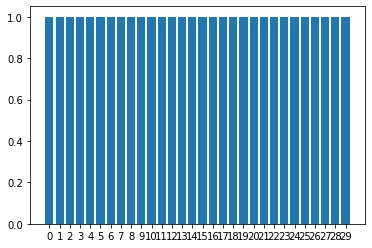

In [133]:
plt.bar(np.arange(0, number_of_features), X.std(axis = 0))
plt.xticks(np.arange(0, number_of_features))
plt.show()

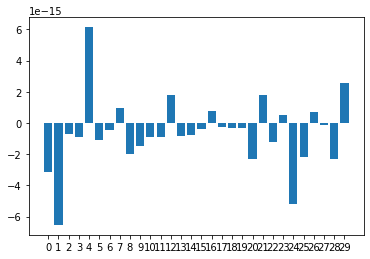

In [134]:
plt.bar(np.arange(0, number_of_features), X.mean(axis = 0))
plt.xticks(np.arange(0, number_of_features))
plt.show()

In [135]:
covariance_matrix = np.cov(X.T)

In [136]:
eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

In [137]:
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(0, len(eig_values))]
eig_pairs.sort(reverse = True)

In [138]:
type(eig_pairs)

list

In [139]:
# range(0, len(eig_values))

In [140]:
# TODO TODO TODO TODO TODO TODO
# sort(reverse = True), np.cov(X.T), range vs arange

- matrica X je dimenzija [number_of_instances x number_of_features]

- transformation_matrix mora biti dimenzija [number_of_features x broj_nove_dimenzije_prostora_atributa]

- njihov proizvod [number_of_instances x number_of_features] [number_of_features x broj_nove_dimenzije_prostora_atributa] ce dati matricu dimenzija [number_of_instances x broj_nove_dimenzije_prostora_atributa]

In [141]:
k = 2 # broj atributa koji ce biti zadrzan (dimenzija novog prostora atributa)

transformation_matrix = np.zeros((number_of_features, k)) # II nacin: np.empty((m, n))
type(transformation_matrix), transformation_matrix.shape

(numpy.ndarray, (30, 2))

In [142]:
for i in range(0, k):
    transformation_matrix[:, i] = eig_pairs[i][1] # i-ti element liste [i], ali 1. element para [1]

In [143]:
# lista ima jedan indeks [], matrica [i, j] ili [i][j]

In [144]:
type(transformation_matrix)

numpy.ndarray

In [145]:
transformation_matrix[:3]

array([[ 0.21890244, -0.23385713],
       [ 0.10372458, -0.05970609],
       [ 0.22753729, -0.21518136]])

In [146]:
X_transformed = transformation_matrix.T.dot(X.T).T # TODO TODO TODO Proveriti zasto ovaj redosled mnozenja
X_transformed.shape

(569, 2)

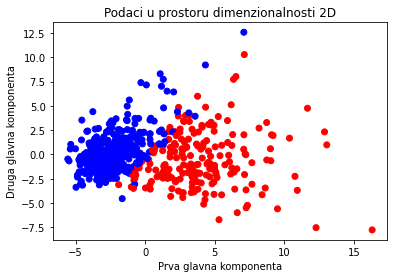

In [160]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c = ['red' if value == 0 else 'blue' for value in y])
plt.xlabel('Prva glavna komponenta')
plt.ylabel('Druga glavna komponenta')
plt.title('Podaci u prostoru dimenzionalnosti 2D')
plt.show()

# PCA - sa biblioteckom podrskom

In [174]:
data_ = datasets.load_breast_cancer()

In [175]:
X_ = data_.data

In [176]:
y_ = data_.target

In [177]:
number_of_features_ = X_.shape[1]
number_of_features_

30

In [182]:
scaler_ = preprocessing.StandardScaler()
scaler_.fit(X_)
X_ = scaler_.transform(X_)

In [186]:
pca_ = decomposition.PCA(n_components = 2)
pca_.fit(X_)
X_pca_ = pca_.transform(X_)

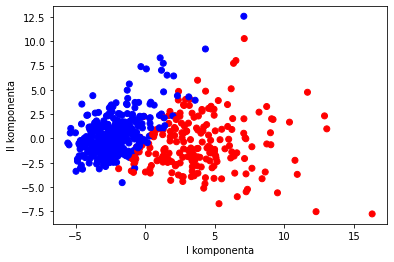

In [187]:
plt.xlabel('I komponenta')
plt.ylabel('II komponenta')
plt.scatter(X_pca_[:, 0], X_pca_[:, 1], c = ['red' if y_val == 0 else 'blue' for y_val in y_])

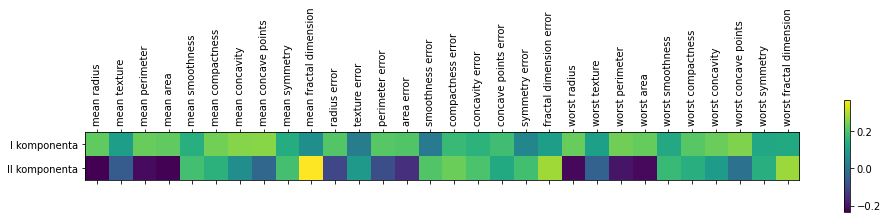

In [202]:
plt.matshow(pca_.components_, cmap = 'viridis')
plt.xticks(np.arange(number_of_features_), data_.feature_names, rotation = 'vertical')
plt.yticks(np.arange(pca_.components_.shape[0]), ['I komponenta', 'II komponenta'])
plt.colorbar()
plt.show()

In [191]:
len(pca.components_)

2

In [193]:
pca.components_.shape[0]

2

In [207]:
pca_.explained_variance_ratio_ # kolicina varijanse koju svaka komponenta objasnjava

array([0.44272026, 0.18971182])

In [206]:
np.sum(pca_.explained_variance_ratio_) # ukupna objasnjena varijansa

0.6324320765155937

([<matplotlib.axis.XTick at 0x1e4a11f04f0>,
 [Text(0, 0, ''), Text(0, 0, '')])

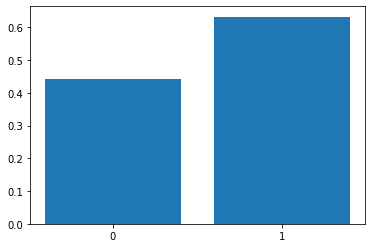

In [217]:
# zajednicki objasnjena varijansa

plt.bar(np.arange(0, len(pca_.components_)), np.cumsum(pca_.explained_variance_ratio_))
plt.xticks(np.arange(len(pca_.components_)))

([<matplotlib.axis.XTick at 0x1e4a119cd60>,
 [Text(0, 0, ''), Text(0, 0, '')])

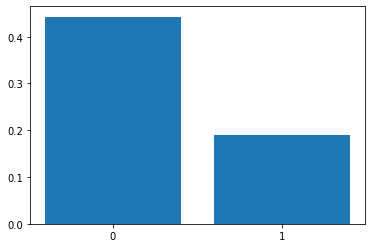

In [216]:
# individualno objasnjena varijansa

plt.bar(np.arange(0, len(pca_.components_)), pca_.explained_variance_ratio_)
plt.xticks(np.arange(len(pca_.components_)))

In [219]:
# odredjivanje polaznih atributa
# instanci (5, 2.5) odgovara sledeci
# vektor polaznog skupa atributa

pca_.inverse_transform([5, 2.5])

array([0.50986939, 0.36935767, 0.59973306, 0.52728315, 1.17823103,
       1.57615579, 1.44241581, 1.21735004, 1.16670672, 1.23825541,
       0.7660135 , 0.31208935, 0.8329865 , 0.63361661, 0.58373339,
       1.433757  , 1.26096716, 1.24289088, 0.67211211, 1.21307168,
       0.59031722, 0.40867838, 0.68350233, 0.57597302, 1.07052369,
       1.40946233, 1.38874795, 1.23378677, 0.96923115, 1.34726839])